# Deep Reinforcement learning for the "Dollar Game" environment

In [184]:
# import the Graph which is the base for our environment
import networkx as nx
from graph import DGGraph
from graph import load_game

# import the classes for ML
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam

# utils
import numpy as np
import json
from matplotlib import pyplot as plt
from datetime import datetime

## Problem setup

### Environment
A graph (DGGraph object) representing a given game. The graph has nodes (with integer values assigned to them) and edges.\
The state is a dictionary {node: node[value] for each node in graph}. 

### Objective
Win the game by making debt (sum of all negative values) non-negative in as few moves as possible (avoid inverse actions; namely, both give and take actions on the same node)

### Action space
On each node, two actions can be taken: 'give' and 'take'.\
'Give' action increases value of the node's neighbors by 1 and subtracts len(neighbors) from its own value.
'Take' action does the complete opposite.\
Thus, $A = \left\{(\text{node},\;\text{give_or_take}): \text{node}\in\text{nodes}, \;\text{give_or_take}\in[\text{give}, \;\text{take}]\right\}$

### Reward function
IDK lol. Probably, something to do with debt (and/or the number of negative values)

## Graph visualization

In [212]:
def transform_positions(pos):
    x, y = pos
    return (x - 160)/640, 1 - y/600

def draw_graph(G, pos=None, savefig=''):
    if not pos:
        pos = {node: transform_positions(node_data['pos']) for node, node_data in G.nodes.items()}
    fig, ax = plt.subplots(figsize=(7, 7))
    for node, node_data in G.nodes.items():
        plt.text(pos[node][0] + 0.02*0, pos[node][1] + 0.02*0, str(node_data['val']), fontsize=14)
    nx.draw_networkx(G, pos=pos, ax=ax, node_size=250)
    if savefig:
        fig.savefig(f'others/{savefig}')

In [156]:
G = load_game('35.json')

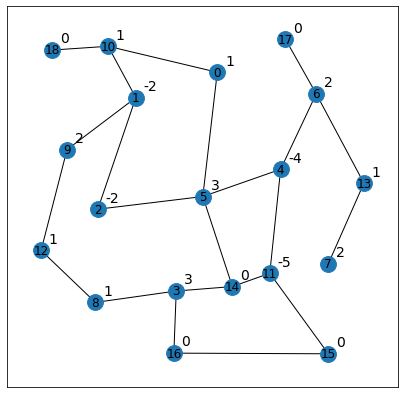

In [157]:
draw_graph(G, savefig='')

# Random connected graph

In [213]:
def random_connected_graph(n):
    done = False
    while not done:
        G = nx.binomial_graph(n, 0.25)
        done = nx.is_connected(G)
    return G

In [214]:
def random_list_of_values(n, bank=0):
    # generate a list of n integers totalling to bank
    a = np.random.randint(0, 5, n)
    return a

In [215]:
def generate_game(number_of_nodes: int, bank_minus_genus=0) -> DGGraph:
    '''
    This function creates a graph representing a playable game (i.e. bank>=genus)
    '''
    G = random_connected_graph(number_of_nodes)
    posit = nx.planar_layout(G)
    genus = G.number_of_edges() - G.number_of_nodes() + 1
    values = random_list_of_values(number_of_nodes)
    dt_string = datetime.now().strftime("%d/%m/%Y %H:%M:%S")

    DG = DGGraph(info={'date_created': dt_string})
    for n in range(number_of_nodes):
        DG.add_node(n, val=values[n], pos=posit[n])
    for e in G.edges():
        DG.add_edge(*e)
    return DG

In [216]:
G_rand = generate_game(10)

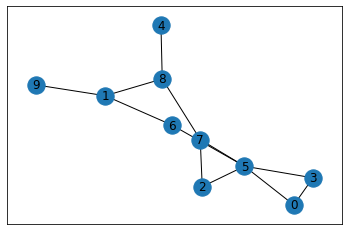

In [217]:
nx.draw_networkx(G_rand)

In [211]:
for n in G_rand.nodes():
    print(n, G_rand.nodes[n])

0 {'val': 2, 'pos': array([-0.68421053, -0.33684211])}
1 {'val': 1, 'pos': array([-0.47368421, -0.23157895])}
2 {'val': 1, 'pos': array([-0.15789474, -0.12631579])}
3 {'val': 4, 'pos': array([0.05263158, 0.18947368])}
4 {'val': 1, 'pos': array([0.36842105, 0.29473684])}
5 {'val': 4, 'pos': array([0.05263158, 0.08421053])}
6 {'val': 4, 'pos': array([0.26315789, 0.4       ])}
7 {'val': 4, 'pos': array([ 1.        , -0.33684211])}
8 {'val': 1, 'pos': array([-0.26315789,  0.08421053])}
9 {'val': 2, 'pos': array([-0.15789474, -0.02105263])}


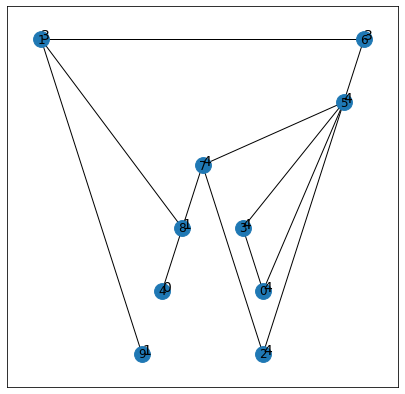

In [218]:
draw_graph(G_rand)